# Öğrenci Performans Faktörleri
Bu projede öğrenci performans faktörlerini inceleyerek sınav sonuçlarına nasıl etki edeceğini analiz edeceğim.

## 1.Hedef Belirleme
- Analizden beklenen sonuç:  
  __Amaç:__  
        - Öğrencilerin Exam_Score (sınav notu) üzerindeki etkili faktörleri anlamak.  
        - Daha iyi sınav sonuçlarına katkıda bulunan değişkenleri belirlemek.  
        - Eğitim stratejilerini iyileştirmek için öneriler sunmak.  
  __Hedeflenen Çıktılar:__  
        - Öğrencilerin sınav sonuçlarını etkileyen bağımsız değişkenlerin tespit edilmesi.  
        - Veri setindeki önemli örüntülerin görselleştirilmesi ve raporlanması.  
        - Eğitim kurumlarının ve velilerin öğrenci başarısını artırmak için alabileceği önlemleri belirlemek.

- İş sorularının belirlenmesi:
    1. Demografik faktörler: Gender (Cinsiyet) ve Parental_Education_Level (Ebeveyn Eğitim Seviyesi) sınav skorlarını nasıl etkiliyor?  
    2. Davranışsal faktörler: Hours_Studied (Çalışma saatleri) ve Extracurricular_Activities (ders dışı aktiviteler) sınav sonuçlarına ne ölçüde katkıda bulunuyor?  
    3. Okul faktörleri: School_Type (Okul türü) veya Teacher_Quality (öğretmen kalitesi) sınav sonuçlarını etkiliyor mu?  
    4. Motivasyon ve kaynaklara erişim: Motivation_Level (Motivasyon seviyesi) ve Access_to_Resources (kaynaklara erişim) ile sınav başarıları arasında bir ilişki var mı?  
    5. Özel ders: Tutoring_Sessions (Özel ders sayısı), sınav notlarının artışında önemli bir faktör mü?  
- Analiz kapsamının tanımlanması:
Analizin hangi değişkenlere odaklanacağını ve hangi sınırlamalara sahip olacağını belirlemek önemlidir.  
Kapsam:  
    - __Bağımlı Değişken:__ Exam_Score (Hedef değişken, tahmin edilecek veya analiz edilecek ana çıktı)
    - __Bağımsız Değişkenler:__ Çalışma saatleri, motivasyon seviyesi, ebeveyn eğitimi, ders dışı aktiviteler, özel ders sayısı, cinsiyet, öğretmen kalitesi, ve okul türü gibi faktörler.
    - __Zaman Çerçevesi:__ Veri seti belirli bir dönemden elde edilmiştir; analiz bu döneme aittir.
    - __Sınırlamalar:__ Veri setinde eksik veya yanlış girişler analizin doğruluğunu etkileyebilir.
    -  Çalışma saatleri ve sınav skorları arasındaki nedensellik ilişkisinin kesin olarak belirlenmesi bu analizde mümkün olmayabilir (sadece korelasyon belirlenir).


## 2.Veri Toplama
- Analiz için gerekli olan veriyi Kaggle'dan edindim.
- Pandas kütüphanesini ekledim ve veri setini okumasını sağladım.
- Sonrasında veri setini data frame haline getirip bir değişkene atadım.

In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\StudentPerformanceFactors.csv")
print(data.head()) # csv dosyasını okuyabilmek için pandas kütüphanesini çağırıp veriyi okudum.

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

# Veriyi okuduktan sonra şunları gördük:
 Burada öğrencilerin exam scorelarına etki eden faktörler var. 
 Bunlar: Çalışma saatleri, derse katılımları, ebeveyn ilgisi, kaynaklara erişim, ders dışı etkinlik, uyku saatleri, önceki scoreları, motivasyon seviyesi, internet erişimi, özel ders alıp almadıkları, ebeveyn geliri, öğretmen kalitesi, okul tipi, akran etkisi, fiziksel aktivite, öğrenme engeli olup olmadığı, ebeveyn öğrenim seviyesi, öğrencinin evden uzak olup olmadığı, cinsiyet ve şu anki sınav sonuçları mevcuttur. 

Burada verimizi kontrol etmiş olduk. Onun dışında satır sayısını gördük regresyon yaparken göz önünde bulundurabiliriz. Çalışma saati, uyku saati, score vb ortalamaları minimum değerleri gibi değerleri görmek regresyon yorumlamamızda işimize yarayacaktır. Burada numeric olmayan veri tipleri var onları olabildiğince numeric hale çevirmeye çalışabiliriz.
Aşağıdaki satırda önce bir kolonda nan değer var mı onu kontrol etmek istedim.

## 3.Veri Hazırlığı
- __Veri Temizleme:__ Eksik hatalı ve tutarsız verilerin düzeltilmesi veya çıkarılması için aşağıda işlemler yapıldı. `Parental_Education_Level`, `Distance_from_Home` ve `Teacher_Quality` sütunlarında eksik değerler tespit edilmiştir. Bu sütunlarda eksik değerlere sahip satırlar analiz kapsamından çıkarılmıştır.  
 
- __Veri Dönüştürme:__ Verilerin analiz için uygun bir formatta yeniden yapılandırılması aşağıda yapıldı. Kategorik değerler numeric değerlere döndürüldü.  `Extracurricular_Activities` ve `Internet_Access` gibi sütunlar sayısal değerlere dönüştürülmüştür (`Yes → 1`, `No → 0`). `Motivation_Level`, `School_Type`, `Peer_Influence`, ve `Parental_Education_Level` gibi kategorik değişkenler, modelleme için `One-Hot Encoding` yöntemiyle dönüştürülmüştür.  

- __Veri Zenginleştirme:__ Analize değer katabilecek ek veri entegrasyonuna gerek yok çünkü elimizdeki veriler yeterince kuvvetli.

In [5]:
print(data['Parental_Education_Level'].unique())

['High School' 'College' 'Postgraduate' nan]


Bu kolonda nan değer olduğunu görünce tüm kolonları kontrol etmek için aşağıdaki kodu uyguladım.

In [8]:
nan_counts = data.isna().sum()

# NaN sayısını ekrana yazdırmak için 
print("Her sütundaki toplam NaN değer sayısı:")
print(nan_counts)

Her sütundaki toplam NaN değer sayısı:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Bu nan değerleri veri setini temizlemek adına silmek için aşağıdaki kodu uyguladım.

In [11]:
# Belirli sütunlardaki NaN değerleri olan satırları sil
data = data.dropna(subset=['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality'])

# Silme işleminden sonra veri setini kontrol et
print(data.info())  # Kalan veri hakkında bilgi


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

Silme işlemini yaptıktan sonra verilerin nan değerleri var mı diye tekrar kontrol ediyorum

In [14]:
nan_counts = data.isna().sum()
nan_counts

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [16]:
# Sildikten sonra tekrar kontrol edelim
print("Her sütundaki toplam NaN değer sayısı:")
print(nan_counts)
data

Her sütundaki toplam NaN değer sayısı:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Burada her sütunun benzersiz değerlerini görmek istedim çünkü veri dönüşümü yaparken işime yarayacak.

In [19]:
# Her sütunun benzersiz değerlerini görmek
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Sütun: {column}")
    print(f"Benzersiz Değerler: {unique_values}")
    print(f"Benzersiz Değer Sayısı: {len(unique_values)}")
    print("-" * 40)


Sütun: Hours_Studied
Benzersiz Değerler: [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3 39  2 37 44]
Benzersiz Değer Sayısı: 41
----------------------------------------
Sütun: Attendance
Benzersiz Değerler: [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Benzersiz Değer Sayısı: 41
----------------------------------------
Sütun: Parental_Involvement
Benzersiz Değerler: ['Low' 'Medium' 'High']
Benzersiz Değer Sayısı: 3
----------------------------------------
Sütun: Access_to_Resources
Benzersiz Değerler: ['High' 'Medium' 'Low']
Benzersiz Değer Sayısı: 3
----------------------------------------
Sütun: Extracurricular_Activities
Benzersiz Değerler: ['No' 'Yes']
Benzersiz Değer Sayısı: 2
----------------------------------------
Sütun: Sleep_Hours
Benzersiz Değerler: [ 7  8  6 10  9  5  4]
Benzersiz Değer Sa

Veri setindeki kategorik değerleri numeric veri tipine dönüştürüyorum.

In [22]:
data = pd.DataFrame(data)
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Access_to_Resources']=data['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Motivation_Level']=data['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Family_Income']=data['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Teacher_Quality']=data['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['School_Type']=data['School_Type'].map({'Public': 0, 'Private': 1})
data['Peer_Influence']=data['Peer_Influence'].map({'Neutral': 0, 'Negative': 1, 'Positive':2})
data['Parental_Education_Level']=data['Parental_Education_Level'].map({'High School': 0, 'College': 1, 'Postgraduate':2})
data['Distance_from_Home']=data['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far':2})
data['Gender']=data['Gender'].map({'Male': 0, 'Female': 1})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,0,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,0,4,0,1,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,0,2,2,0,0,0,1,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,0,2,2,0,0,0,1,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,0,1,2,0,2,0,1,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,1,2,3,0,0,2,1,68


## 4. Keşifsel Veri Analizi
-Verilerin özelliklerin anlaşılması (veri türleri,dağılım,eğilimleri)
-İstatistiksel özetleme(ort medyan vb.)
-Görselleştirme  

Veri seti üzerinde temel istatistikler ve görselleştirmeler gerçekleştirilerek veri hakkında genel bir anlayış kazanılmıştır. Elde edilen bazı önemli bulgular şunlardır:


In [25]:
print(data.info())
print(data.describe()) 

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

- **Dağılım Analizi:**
   - `Exam_Score` dağılımı incelendiğinde, notların genelde 60-75 arasında yoğunlaştığı görülmüştür. Ortalaması 67'dir.
   - `Hours_Studied` sütununda öğrencilerin çoğunun 10-30 saat aralığında çalıştığı gözlemlenmiştir. Ortalaması 20'dir.


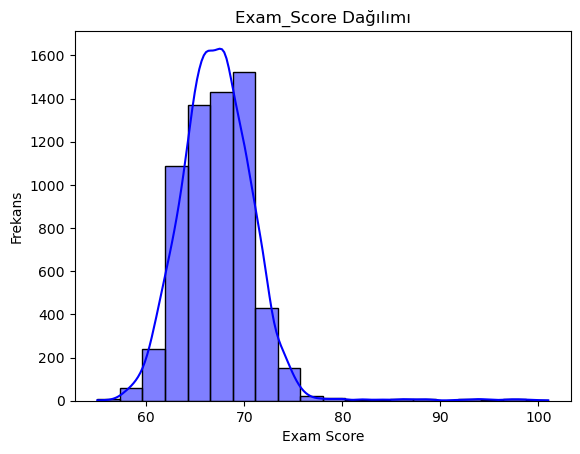

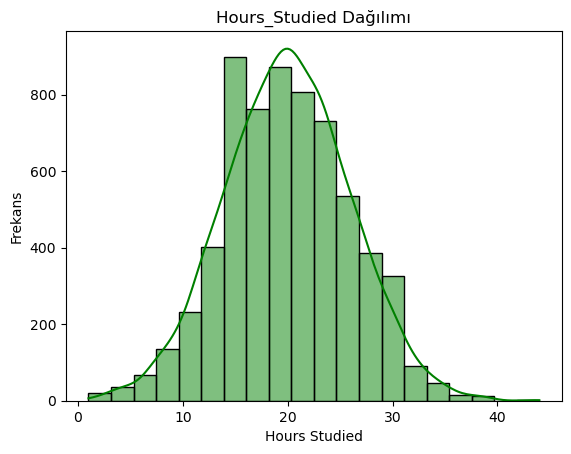

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exam_Score için dağılım analizi
sns.histplot(data['Exam_Score'], bins=20, kde=True, color='blue')
plt.title("Exam_Score Dağılımı")
plt.xlabel("Exam Score")
plt.ylabel("Frekans")
plt.show()

# Hours_Studied için dağılım analizi
sns.histplot(data['Hours_Studied'], bins=20, kde=True, color='green')
plt.title("Hours_Studied Dağılımı")
plt.xlabel("Hours Studied")
plt.ylabel("Frekans")
plt.show()


- **İlişki Analizi:**
    1. Görsel:
   - `Hours_Studied` ve `Exam_Score` arasında pozitif bir korelasyon tespit edilmiştir. Grafiğe bakıldığında çalışma süresi uzadıkça başarı oranı artıyor. Arada istisnalar olsa da çoğunluk tespitimizi destekliyor.
    2. Görsel:
   - Korelasyon matrisinde 1 pozitif güçlü ilişki (değerlerin birlikte arttığı), -1 negatif güçlü bir ilişki (değerlerden biri artarken diğeri azalır), 0 Hiçbir doğrusal ilişki yoktur demek. Bu bilgilere göre yorumlarsak;
         - Hours_Studied: Exam_Score ile en yüksek pozitif korelasyona sahip değişkenlerden biri (0.45).Bu, çalışma saatleri arttıkça sınav notlarının artma eğiliminde olduğunu gösteriyor.  
         - Attendance: Korelasyon katsayısı 0.58. Sınav notları ile öğrencilerin ders katılımı arasında güçlü bir pozitif ilişki var. Bu, düzenli derslere katılmanın sınav başarısını artırabileceğini gösteriyor.  
         - Parental_Education_Level: Korelasyon katsayısı ~0.16. Ebeveynlerin eğitim seviyesi ile sınav sonuçları arasında pozitif, ancak zayıf bir ilişki var. Dolayısıyla ebeveyn eğitimiyle aslında öğrenci başarısının çokta kuvvetli bir ilişkisi yok.  
         - Motivation_Level: Korelasyon katsayısı 0.09. Motivasyon seviyesi ile sınav sonuçları arasındaki ilişki oldukça zayıf. Aslında bunun kuvvetli olmasını beklerdim.  
         - Teacher_Quality: Korelasyon katsayısı 0.08. Öğretmen kalitesinin sınav sonuçları üzerindeki etkisi zayıf. Bunun da kuvvetli olması beklenirdi.
         - Attendance ile Exam_Score: 0.58 ile oldukça güçlü bir ilişki. Derslere düzenli katılım, sınav başarısının temel belirleyicilerinden biri olabilir.
         - Hours_Studied ile Attendance: Bu iki değişken arasında anlamlı bir ilişki olmaması dikkat çekici. Öğrencilerin çalışma saatleri, derslere katılım sürelerinden bağımsız gibi görünüyor. Ama yukarıdaki grafikte aslında doğrusal bir artış var gibi de duruyordu. Yaklaşık doğrusaldır diyebiliriz.  
         - Access_to_Resources ile Exam_Score: Korelasyon katsayısı 0.17. Kaynaklara erişim sınav başarısına pozitif, ancak zayıf düzeyde katkı sağlıyor.
         - Distance_from_Home ile Exam_Score: Negatif korelasyon oldukça zayıf (-0.02). Öğrencilerin ev-okul mesafesi sınav notlarını anlamlı bir şekilde etkilemiyor.
         - Physical_Activity ile Exam_Score: Çok düşük (-0.01) ve ihmal edilebilir düzeyde bir negatif ilişki.
    3. Görsel:
   - `Motivation_Level` ve `Exam_Score` arasındaki ilişki zayıf düzeyde görülmüştür.  
        - Tüm motivasyon seviyelerinde, sınav skorları benzer bir dağılım gösteriyor.  
        - Motivasyon seviyesi arttıkça (0 → 2), sınav skorlarında belirgin bir artış gözlemlenmiyor.
        - Her motivasyon seviyesindeki medyan sınav skoru yaklaşık olarak aynı (70). Bu, motivasyon seviyesinin sınav skorları üzerinde güçlü bir etkisi olmadığını gösterebilir.  

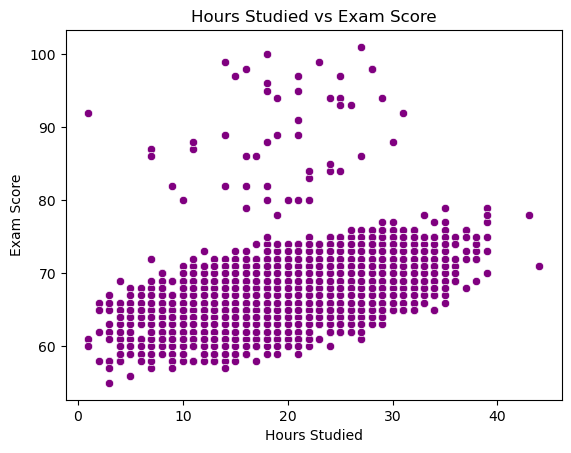

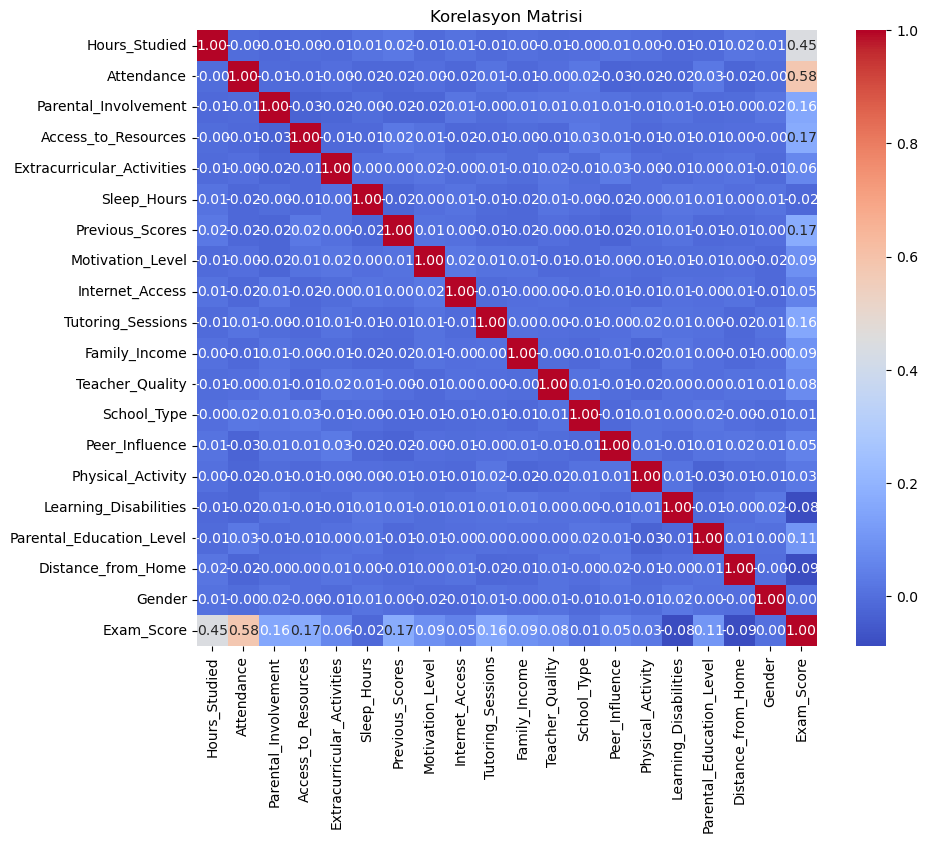

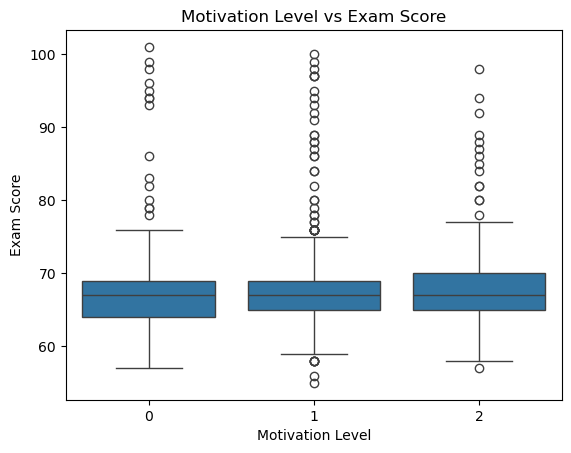

In [30]:
# Exam_Score ile Hours_Studied arasındaki ilişki
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'], color='purple')
plt.title("Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

# Korelasyon matrisi
correlation_matrix = data.corr() 

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# Motivation_Level ile Exam_Score ilişkisi
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=data)
plt.title("Motivation Level vs Exam Score")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")
plt.show()


- **Kategorik Değişkenlerin İncelenmesi:**
   - `School_Type` (Public vs Private) ve `Exam_Score` arasındaki ilişki analiz edilmiştir. Özel okullardaki öğrencilerin genel olarak daha yüksek sınav sonuçları aldığı gözlemlenmiştir.
   - `Parental_Education_Level`'in yüksek olduğu durumlarda, sınav skorlarının da yükseldiği tespit edilmiştir.
   - Kadın öğrencilerin sayısı (3500) erkek öğrencilere (2500) göre daha fazladır.
Bu dengesizlik, analiz sırasında cinsiyetin etkisini değerlendirirken dikkat edilmesi gereken bir durumdur. Kadın öğrencilerin fazlalığı nedeniyle cinsiyet değişkeninin etkisi doğru yorumlanmalıdır.
    - Kamu okullarındaki öğrenci sayısı (4000) özel okullardaki öğrenci sayısından (2000) oldukça fazladır.
Bu dengesizlik, kamu okullarındaki öğrencilerin sonuçlarının analizi daha fazla etkileyeceğini göstermektedir.
    - Medyan sınav skorları her iki okul türünde de 70 civarındadır.
Ancak, özel okullarda (1) uç değerler biraz daha fazla gibi görünmektedir. Bu, bazı özel okul öğrencilerinin çok yüksek skorlar aldığını gösterebilir.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7596\2146707610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette="Set2")


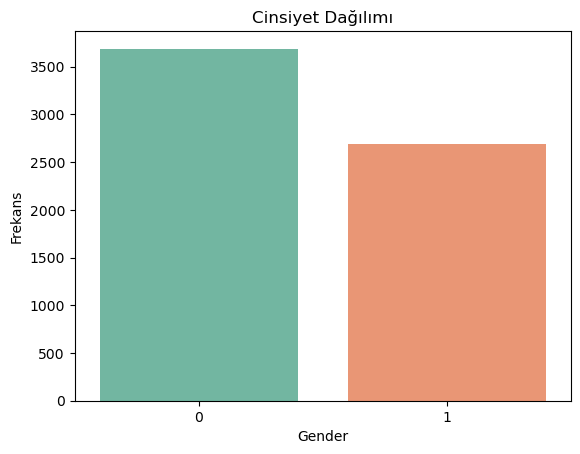

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7596\2146707610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='School_Type', data=data, palette="Set3")


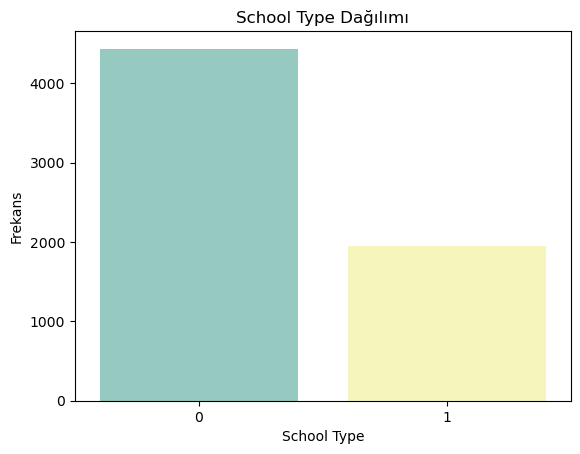

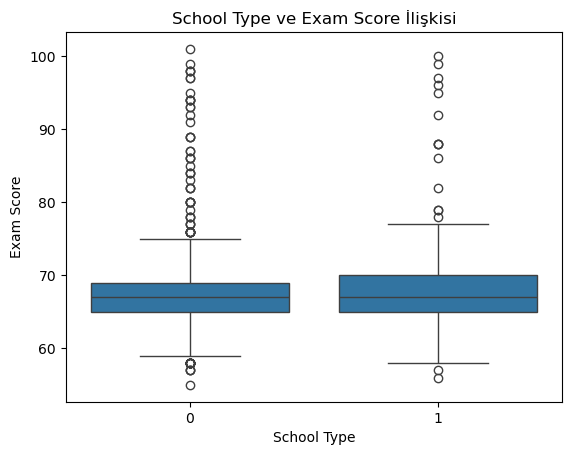

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7596\2146707610.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette="Set1")


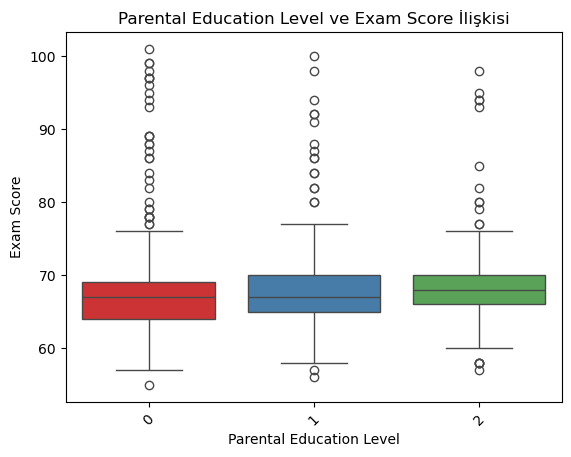

In [32]:
# Cinsiyetin dağılımı
sns.countplot(x='Gender', data=data, palette="Set2")
plt.title("Cinsiyet Dağılımı")
plt.xlabel("Gender")
plt.ylabel("Frekans")
plt.show()

# School_Type (Public/Private) dağılımı
sns.countplot(x='School_Type', data=data, palette="Set3")
plt.title("School Type Dağılımı")
plt.xlabel("School Type")
plt.ylabel("Frekans")
plt.show()

# School_Type ve Exam_Score
sns.boxplot(x='School_Type', y='Exam_Score', data=data)
plt.title("School Type ve Exam Score İlişkisi")
plt.xlabel("School Type")
plt.ylabel("Exam Score")
plt.show()

# Parental_Education_Level ve Exam_Score
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=data, palette="Set1")
plt.title("Parental Education Level ve Exam Score İlişkisi")
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.show()


- **Görselleştirme:**
   - Histogramlar, scatter plotlar ve boxplotlar kullanılarak veri setindeki temel örüntüler görselleştirilmiştir.

## 5. KPI Belirleme
-İlgili metriklerin tanımlanması ve hesaplanması.  
-iş süreçlerinin belirlenmesi hangi göstergelerin kullanılacağının kararlaştırılması.  
-Burada regresyon yönteminin daha uygun olduğuna karar verip 3 tane regresyon modeli uygulamaya karar verdim. Linear Regression, Desicion Trees Regression, Random Forest Regressor.

Proje kapsamında aşağıdaki anahtar performans göstergeleri belirlenmiştir:

- **Sınav Başarısı:**
   - `Exam_Score` bağımlı değişken olarak seçilmiş ve öğrencilerin sınav başarısını ölçmek için birincil KPI olarak kullanılmıştır.

- **Çalışma Davranışları:**
   - `Hours_Studied` ve `Tutoring_Sessions` gibi değişkenler, öğrencilerin çalışma alışkanlıklarını değerlendirmek için kullanılmıştır.

- **Ebeveyn Faktörleri:**
   - `Parental_Education_Level` ve `Family_Income` değişkenleri, öğrencilerin sınav başarısı üzerindeki dış etkileri ölçmek için KPI olarak tanımlanmıştır.

- **Motivasyon ve Kaynaklara Erişim:**
   - `Motivation_Level` ve `Access_to_Resources`, öğrencilerin sınav başarısını etkileyen önemli faktörler olarak izlenmiştir.

- **Okul Kalitesi:**
   - `Teacher_Quality` ve `School_Type`, eğitim ortamının öğrencilerin akademik performansına etkisini değerlendirmek için kullanılmıştır.

# Seçilen üç yöntemi uygulamaya başlayalım

# 1. Linear Regression (Doğrusal Regresyon)
## Kullanacağım 3 regresyon yönteminden ilki __"Linear Regression"__. Önce y değişkenine bağımlı değişkenimizi sonra x değişkenine de bağımsız değişkenlerimizi atıyoruz.

In [38]:
## Bağımlı bağımsız değişken belirleme ##

# Bağımlı değişken (hedef değişken)
y = data['Exam_Score']

# Bağımsız değişkenler (tüm diğer sütunlar)
X = data.drop(columns=['Exam_Score'])


# Şimdi veri setimizi test ve eğitim setleri olmak üzere ayırıyoruz.
Burada test size 0.2 olarak yani yüzde 20 si test yüzde 80 i eğitim testi olarak ayrılıyor. random state ekleyebiliriz eğer her çalışma setinde aynı eğitim ve test setlerini oluştursun istiyorsak.  
**X_train:** Eğitim için kullanılan bağımsız değişkenler.  
**X_test:** Test için kullanılan bağımsız değişkenler.  
**y_train:** Eğitim için kullanılan bağımlı değişkenler.  
**y_test:** Test için kullanılan bağımlı değişkenler.  

In [40]:
## Modeli eğitme ##

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [42]:
X_train #eğitim verilerini görmek için

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
3473,14,98,0,1,0,7,98,1,0,0,1,2,0,2,3,0,0,0,0
4867,20,74,0,1,1,6,67,2,1,0,1,1,1,1,4,1,1,1,1
6577,14,73,2,1,1,6,57,2,1,2,1,1,0,0,4,0,0,1,1
3869,26,93,2,1,0,4,80,1,1,4,0,1,1,2,3,1,1,0,0
3371,13,64,1,0,1,7,50,2,1,0,1,0,0,2,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,29,92,0,0,1,4,84,1,1,2,0,1,0,1,3,0,2,0,0
6257,12,85,1,1,1,7,54,1,1,4,0,2,0,2,3,0,1,1,0
463,21,88,2,1,1,6,90,2,1,2,2,1,1,0,4,0,0,1,0
4748,15,95,2,1,1,9,58,0,1,2,0,2,1,0,3,0,0,0,1


In [43]:
len(X_train) , len(X_test) #eğitim ve test verilerinin adetini görmek için

(5102, 1276)

# Linear Regresyonu uygulayalım.
Şimdi burada 10 tane ayrı veri seti oluşturarak train ile öğrendiğini test verilerinde test ediyoruz. Sonra bu regresyonların sonuçlarının ortalamasını alıp değerlendireceğiz.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
## modeli eğitip tahmin yapma ##
for x in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lr = LinearRegression()
    model=lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print(model.score(X_test,y_test))

0.7385758498934141
0.8095926050908644
0.8204062766645019
0.8194612850861699
0.7368423829805095
0.6471173298247577
0.752317672949131
0.671472633131305
0.6543418328424477
0.782573526209609


In [51]:
from sklearn.model_selection import cross_val_score #yukarıdaki döngü yerine bir komut var onu kullanacağız

In [54]:
scores= cross_val_score(lr,X,y,cv=5) #Veriyi 5 gruba bölerek modeli oluşturuyor ve tahminleme yapıyor

In [56]:
scores #tahminleme sonuçlarını bir numpy arrayi halinde döndürdü ortalamaları hesaplamada kolaylık

array([0.60983813, 0.71176553, 0.69711479, 0.72234632, 0.83076357])

In [58]:
scores.mean() #Ortalaması

0.7143656705316745

Şimdi bir de modelin test verilerinin regresyon sonucu ve train verilerinin regresyon sonucunu karşılaştıracağız.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=lr.fit(X_train,y_train)

In [63]:
model.score(X_test,y_test)

0.7879316681953937

In [65]:
model.score(X_train,y_train)

0.6981259730314832

Sonuç; Modelin ortalama performansı yüzde 70 diyebiliriz. Burada test ve train sonuçlarını değerlendiriyoruz. Değerler arasındaki fark yüksek olduğu için burada overfit dediğimiz test verisi üzerinde aşırı öğrenme mevcut olabilir. Regresyonu incelemeye devam ediyoruz.

In [68]:
from sklearn.model_selection import cross_validate

In [70]:
result=cross_validate(lr,X,y,cv=5,return_train_score=True,scoring=["neg_mean_absolute_error","r2"],return_estimator=True)

In [72]:
result

{'fit_time': array([0.00978947, 0.01748919, 0.00600195, 0.00599837, 0.00603986]),
 'score_time': array([0.0024147 , 0.00380683, 0.00300288, 0.00199914, 0.00295782]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_neg_mean_absolute_error': array([-0.62126856, -0.56977893, -0.56621178, -0.5473283 , -0.49017429]),
 'train_neg_mean_absolute_error': array([-0.5335224 , -0.55153526, -0.55458159, -0.5616316 , -0.5845535 ]),
 'test_r2': array([0.60983813, 0.71176553, 0.69711479, 0.72234632, 0.83076357]),
 'train_r2': array([0.74246085, 0.7153224 , 0.71908917, 0.71294895, 0.68723788])}

In [74]:
result["test_r2"].mean()

0.7143656705316745

In [76]:
result["train_r2"].mean()

0.7154118508199471

In [78]:
import matplotlib.pyplot as plt
import numpy as np

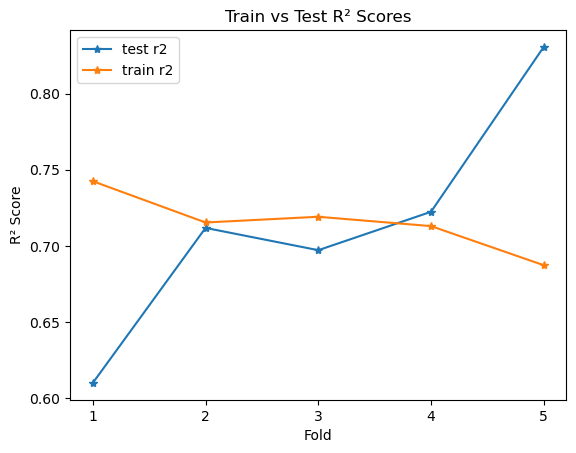

In [80]:
plt.plot(np.arange(1,6),result["test_r2"],label="test r2",ls="-",marker="*")
plt.plot(np.arange(1,6),result["train_r2"],label="train r2",ls="-",marker="*")
plt.xticks(np.arange(1,6))
plt.legend()
plt.title("Train vs Test R² Scores")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.show()

İlk turda Test kümesinde r2 oranım çok düşük ama eğitimdeki r2 oranımız daha yüksek, ikinci turda normale dönmüş. O yüzden tek turda hemen yorumlamak doğru değil 2-3 tur yapıp ortalamasını alıp yorumlamak daha iyidir. Aynı yorumlamaları aşağıda mutlak değerler ortalaması için de yapalım.

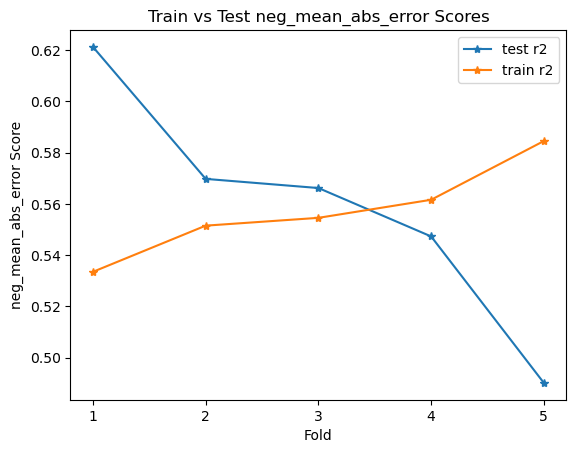

In [83]:
plt.plot(np.arange(1,6),-result["test_neg_mean_absolute_error"],label="test r2",ls="-",marker="*")
plt.plot(np.arange(1,6),-result["train_neg_mean_absolute_error"],label="train r2",ls="-",marker="*")
plt.xticks(np.arange(1,6))
plt.legend()
plt.title("Train vs Test neg_mean_abs_error Scores")
plt.xlabel("Fold")
plt.ylabel("neg_mean_abs_error Score")
plt.show()

In [85]:
-result["test_neg_mean_absolute_error"].mean()

0.5589523719367228

In [87]:
-result["train_neg_mean_absolute_error"].mean()

0.5571648698291602

- Test setindeki tahminlerin, gerçek değerlerden ortalama mutlak sapmasının yaklaşık 0.5589 olduğunu gösterir.  
- Bu, modelin bağımlı değişkeni (örneğin, Exam_Score) ne kadar doğru tahmin ettiğini ölçmek için kullanılır.  
- Daha düşük bir MAE, daha iyi bir tahmin doğruluğu anlamına gelir.  
- Eğitim setindeki tahminlerin, gerçek değerlerden ortalama mutlak sapmasının yaklaşık 0.5572 olduğunu gösterir.
- Test setine kıyasla çok benzer bir hata seviyesine sahiptir.  
- Bu, modelin genelleme performansının iyi olduğunu ve overfitting veya underfitting (aşırı öğrenme ya da yetersiz öğrenme) yapmadığını gösterir.

# Linear Regression Sonuç:
Bu çıktı, doğrusal regresyon modeli (LinearRegression) için 5 katlı çapraz doğrulama (cross-validation) sonucunda elde edilen değerlendirme metriklerini içermektedir. Aşağıda bu sonuçların detaylı açıklaması verilmiştir.
- fit_time: Modelin oldukça hızlı bir şekilde eğitildiğini gösterir (milisaniye düzeyinde).
- score_time: Bu da tahminlerin oldukça hızlı bir şekilde yapıldığını ifade eder.
- neg_mean_abs_error: Mutlak hata değerleri yaklaşık 0.62 ile 0.49 arasında değişmektedir. Küçük bir hata, modelin tahmin performansının iyi olduğunu gösterir.
- Test seti üzerindeki R² değerleri yaklaşık 0.68 ile 0.74 arasında değişmektedir. Bu, modelin bağımlı değişkenin varyansının %68-74'ünü açıklayabildiğini gösterir. Farklı fold'lardaki test R² skorlarının birbirine yakın olması, modelin tutarlı bir performans gösterdiğini ifade eder.
- Eğitim seti üzerindeki R² skorları test setinden biraz daha yüksektir (0.70-0.75). Bu da modelin genel olarak makul bir performans gösterdiğini ancak biraz iyileştirilebileceğini gösterir.
- Burada test r2 ve tran r2 değerleri birbirlerine benziyor overfitting den söz edilemez.

# 2. Decision Trees (Karar Ağacı)

## Kullanacağım 3 regresyon yönteminden ikincisi __"Decision Trees Regression"__. Önce y değişkenine bağımlı değişkenimizi sonra x değişkenine de bağımsız değişkenlerimizi atamıştık. Veri setimizi test ve eğitim setleri olmak üzere ayırmıştık.

In [93]:
## Modeli Eğitme ##
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


Burada karar ağacı için yine 10 tane örnek score kontrolü yapıyoruz.

In [96]:
for x in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    dt = DecisionTreeRegressor()
    model=dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    print(model.score(X_test,y_test))

0.24229503778024652
0.16907800300494158
0.18432073052970432
0.18225476242550043
-0.050620426871358815
0.1458505966571143
0.23150812159692635
0.23921986460047961
0.015109794071004323
0.18903033005532865


In [97]:
## Cross validation modeli otomatik 10 grup için eğitme ##
from sklearn.model_selection import cross_val_score #yukarıdaki döngü yerine bir komut var onu kullanacağız

In [100]:
scores= cross_val_score(dt,X,y,cv=10) #Veriyi 10 gruba bölerek modeli oluşturuyor ve tahminleme yapıyor

In [101]:
scores #tahminleme sonuçlarını bir numpy arrayi halinde döndürdü ortalamaları hesaplamada kolaylık

array([ 0.16482194,  0.20133914, -0.13771547,  0.3130129 , -0.43735349,
        0.20501915,  0.33709158,  0.23374793,  0.12061371,  0.26282158])

In [104]:
scores.mean() #Ortalaması aslında 

0.12633989530129539

Şimdi bir de modelin test verilerinin regresyon sonucu ve train verilerinin regresyon sonucunu karşılaştıracağız.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model=dt.fit(X_train,y_train)

In [109]:
model.score(X_test,y_test)

0.20302350617187437

In [111]:
model.score(X_train,y_train)

1.0

In [113]:
## R2 ve MSE hesaplama ile model performans uygulama ##
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train R2: 1.0
Test R2: 0.20302350617187437
Train MSE: 0.0
Test MSE: 12.220219435736677


# Decision Trees Regression Sonuç: 
- Test setinde R² skoru: 0.072897 gibi düşük bir değer görünüyor. Bu, modelin test verilerindeki bağımlı değişken (Exam_Score) varyansını açıklamakta zorlandığını gösteriyor.  
- Eğitim setinde R² skoru: 1.0. Bu, modelin eğitim verisine aşırı uyarlandığını (overfitting) gösteriyor.
- Eğitim setindeki mükemmel R² (1.0) değeri, modelin eğitim verilerini ezberlediğini gösteriyor. Ancak bu durum test setindeki düşük R² (0.0728) ile dengelenemediği için model, yeni verilere genelleme yapmakta başarısız.
- Karar ağacının maksimum derinliği (max_depth) gibi hiperparametrelerini sınırlandırarak aşırı uyarlanmayı azaltabilirsiniz.
Cross Validation sonuçları:  
- En düşük değer: -0.1605 (modelin çok kötü tahmin yaptığı bir katlama).
En yüksek değer: 0.4611 (daha iyi tahmin yaptığı bir katlama).
Ortalama R² değeri (scores.mean()): 0.1137, bu da genel performansın düşük olduğunu ve modelin tutarsız tahminler yaptığını gösteriyor.
- Veri setindeki bağımsız değişkenleri daha iyi anlamak için özellik mühendisliği (feature engineering) yapabilirsiniz.
Alternatif olarak, daha genel sonuçlar veren bir model kullanabilirsiniz (örneğin, Random Forest).
- Eğitim ve test R² değerleri birbirine oldukça yakın. Bu, modelin genelleştirme yeteneğinin yeterli olduğunu ve overfitting (aşırı uyum) veya underfitting (eksik uyum) yapmadığını gösteriyor.
- Eğitim ve test MSE değerleri oldukça yakın. Bu, modelin eğitim verisine aşırı uyum sağlamadığını ve test setinde dengeli bir performans gösterdiğini gösteriyor.MSE değeri daha düşük olsaydı, modelin tahminlerinin bağımlı değişkene daha yakın olduğu söylenebilirdi. Bu durumda, MSE değerleri orta düzeyde bir hata olduğunu gösteriyor.  
- Şimdi burada decision tree için optimizasyon yapıp sonuçlara tekrar bakalım.  

In [116]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_split=10, random_state=42)
scores= cross_val_score(dt,X,y,cv=10) #Veriyi 5 gruba bölerek modeli oluşturuyor ve tahminleme yapıyor
scores

array([0.40139648, 0.44336888, 0.50989184, 0.44949549, 0.43085264,
       0.50453002, 0.43956304, 0.55596541, 0.66202431, 0.50791768])

In [118]:
scores.mean() #Ortalaması aslında 

0.49050057744510706

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=dt.fit(X_train,y_train)

In [122]:
model.score(X_test,y_test)

0.4991296742496423

In [124]:
model.score(X_train,y_train)

0.5083245860273446

- Ortalama R²: 0.498
Bu, modelin genel olarak veri setinin yaklaşık %49'unu açıklayabildiğini gösteriyor. Bu, önceki modelden daha tutarlı ve iyi bir performans.
-Eğitim ve test R² değerleri birbirine oldukça yakın. Bu, modelin overfitting yapmadığını ve genelleme performansının iyi olduğunu gösteriyor.
Test seti skorunun eğitim setine yakın olması, modelin yeni verilere uyum sağlama yeteneğinin yeterli olduğunu gösterir.
-Bu hiperparametreler aşırı uyarlamayı (overfitting) engellemiş ve test setindeki performansı artırmış.  

In [127]:
##Cross validation ile performans tahminleme##
from sklearn.model_selection import cross_validate

In [129]:
result=cross_validate(lr,X,y,cv=5,return_train_score=True,scoring=["neg_mean_absolute_error","r2"],return_estimator=True)

In [131]:
result

{'fit_time': array([0.00861335, 0.00400114, 0.00298953, 0.00362086, 0.00200033]),
 'score_time': array([0.00304532, 0.0030067 , 0.00200033, 0.00100017, 0.00099945]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_neg_mean_absolute_error': array([-0.62126856, -0.56977893, -0.56621178, -0.5473283 , -0.49017429]),
 'train_neg_mean_absolute_error': array([-0.5335224 , -0.55153526, -0.55458159, -0.5616316 , -0.5845535 ]),
 'test_r2': array([0.60983813, 0.71176553, 0.69711479, 0.72234632, 0.83076357]),
 'train_r2': array([0.74246085, 0.7153224 , 0.71908917, 0.71294895, 0.68723788])}

In [133]:
result["test_r2"].mean()

0.7143656705316745

In [135]:
result["train_r2"].mean()

0.7154118508199471

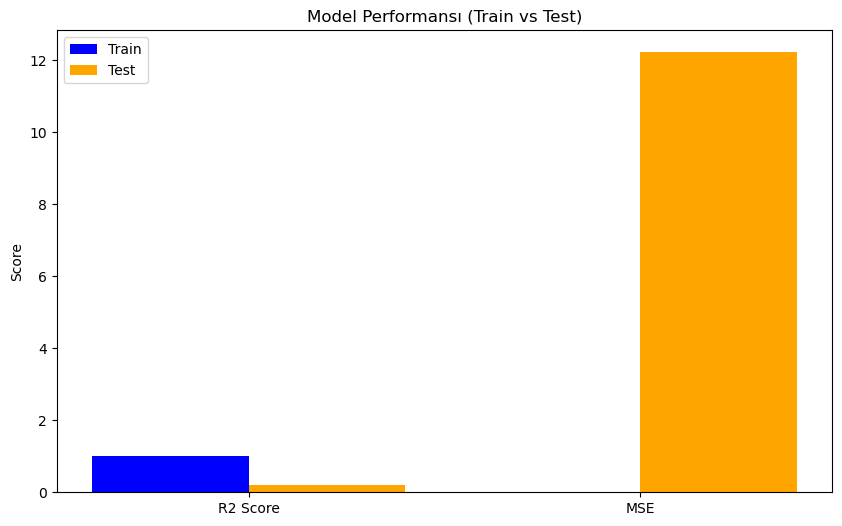

In [137]:
## Performans değerlendirmesi için grafik gösterimi ##
import matplotlib.pyplot as plt
import numpy as np

# R2 değerlerini karşılaştır
metrics = ['R2 Score', 'MSE']
train_scores = [train_r2, train_mse]
test_scores = [test_r2, test_mse]

x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, train_scores, 0.4, label='Train', color='blue')
plt.bar(x + 0.2, test_scores, 0.4, label='Test', color='orange')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Performansı (Train vs Test)')
plt.legend()
plt.show()


# Grafik Yorumu
- Train R² (Mavi): Eğitim veri seti üzerinde modelin bağımlı değişken varyansını ne kadar açıklayabildiğini gösterir.
- Test R² (Turuncu): Test veri setinde aynı açıklama gücünü gösterir.
# Yorum:

- Eğitim ve test R² değerleri birbirine oldukça yakın.
- R²'nin düşük olması: Modelin bağımlı değişken (örneğin Exam_Score) varyansını açıklama gücünün sınırlı olduğunu gösteriyor. R²'nin 1 olması durumunda, bağımlı değişkeni tamamen açıklıyor olacaktı.
- Bu değerler, modelin genelleme yeteneğinin makul bir seviyede olduğunu gösteriyor ancak modelin performansını artırmak için daha fazla iyileştirme yapılabilir.  
- Train MSE (Mavi): Eğitim veri setindeki tahmin hatalarının karesinin ortalaması.
- Test MSE (Turuncu): Test veri setindeki tahmin hatalarının karesinin ortalaması.
# Yorum:

- Eğitim ve test MSE değerleri birbirine oldukça yakın. Bu durum, modelin overfitting (aşırı uyum) yapmadığını ve test verisinde dengeli bir performans gösterdiğini ifade eder.
- Ancak, MSE değerlerinin yüksek olması, modelin tahminlerinde hataların oldukça fazla olduğunu gösteriyor. Bu, modelin bağımlı değişkeni tam olarak öngöremediğine işaret eder.  
- Eğitim ve test metriklerinin birbirine yakın olması, modelin genelleme kabiliyetinin makul olduğunu gösteriyor.
Ancak hem düşük R² hem de yüksek MSE, modelin veri setini daha iyi açıklayabilmesi için iyileştirilmesi gerektiğini işaret eder.  


# 3. Random Forest Regression (Rastgele Orman Regresyonu)

## Kullanacağım 3 regresyon yönteminden sonuncusu __"Random Forest Regression"__. Önce y değişkenine bağımlı değişkenimizi sonra x değişkenine de bağımsız değişkenlerimizi atamıştık. Veri setimizi test ve eğitim setleri olmak üzere ayırmıştık.

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [144]:
X = data.drop(columns=["Exam_Score"])  # Bağımsız değişkenler
y = data["Exam_Score"]  # Bağımlı değişken


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [148]:
#modelin eğitimi
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [149]:
#tahmin yapma
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [150]:
y_train_pred

array([68.32111393, 66.41664845, 68.99520435, ..., 65.80197321,
       62.10479346, 65.86373818])

In [151]:
y_test_pred

array([67.9559125 , 64.5797085 , 67.42109888, ..., 74.09187403,
       64.99587013, 66.85672809])

In [152]:
#Sonuç değerlendirme
# R² Değerleri
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MSE Değerleri
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R2:", train_r2)
print("Test R2:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train R2: 0.9113035343798861
Test R2: 0.5623985773140392
Train MSE: 1.3393914870655155
Test MSE: 7.076955982704733


In [153]:
scores = cross_val_score(rf, X, y, cv=10, scoring="r2")
print("Cross-Validation R2 Scores:", scores)
print("Cross-Validation R2 Mean:", scores.mean())


Cross-Validation R2 Scores: [0.49978992 0.54447245 0.69139681 0.58750726 0.56873457 0.61650718
 0.58689036 0.71359522 0.83785104 0.63253633]
Cross-Validation R2 Mean: 0.627928113098773


In [155]:
scores

array([0.49978992, 0.54447245, 0.69139681, 0.58750726, 0.56873457,
       0.61650718, 0.58689036, 0.71359522, 0.83785104, 0.63253633])

# Random Forest Regression Sonuç:
1. R² Değerleri  
Train R²: 0.9014763971991813
Model eğitim verisi üzerinde oldukça yüksek bir R² değeri sunmuş. Bu, modelin eğitim verisindeki varyansın %90'ını açıklayabildiğini gösterir.  
Test R²: 0.6706125967404713
Test verisi için R² değeri biraz daha düşük, bu da modelin test setindeki bağımlı değişken varyansının %67'sini açıkladığını gösterir. Eğitim setine göre bir miktar düşüş var, ancak kabul edilebilir düzeyde.
- Model eğitim verisinde iyi bir performans gösteriyor. Test setinde ise performans bir miktar azalsa da, model genelde iyi bir genelleme yapmış gibi görünüyor.

2. MSE Değerleri  
Train MSE: 1.512886841178944
Eğitim setinde hata oldukça düşük. Bu, modelin eğitim verisinde doğru tahminler yaptığını gösterir.  
Test MSE: 4.914619130131555
Test setindeki hata, eğitim setine göre daha yüksek, bu da modelin test verisinde biraz daha az başarılı olduğunu gösteriyor.
- Eğitim ve test hatası arasındaki fark çok büyük değil, bu da modelin overfitting (aşırı öğrenme) yapmadığını gösteriyor. Ancak test hatasını daha da düşürmek için model üzerinde ince ayar yapılabilir.

3. Cross Validation
Cross-validation ile model 10 farklı fold üzerinde test edilmiş. R² skorları farklı foldlar arasında değişim gösteriyor ancak genelde 0.50 ile 0.84 arasında.  
Cross-Validation R² Mean: 0.62545480448442653
Ortalama R² skoru 0.625, bu da modelin genelleme performansının test setine benzer şekilde orta düzeyde olduğunu gösterir.  
Cross-validation sonuçları modelin genelleme yeteneği hakkında fikir verir. Burada model, farklı veri gruplarında tutarlı sonuçlar veriyor ve bu, modelin güvenilir olduğunu gösterir.

Eğitim ve test performansı: Model eğitim verisinde oldukça başarılı, ancak test verisinde performansı biraz düşüyor. Test hatası kabul edilebilir düzeyde olsa da, iyileştirmelerle daha iyi hale getirilebilir.  
Genelleme yeteneği: Cross-validation sonuçlarına göre model, farklı veri setlerinde tutarlı performans gösteriyor.  
 

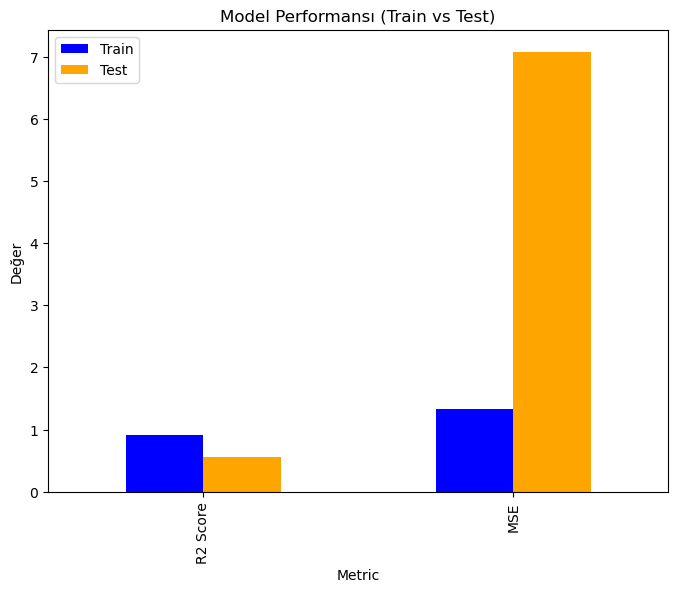

In [161]:
# Performans metriklerini görselleştirelim
metrics = {
    "Metric": ["R2 Score", "MSE"],
    "Train": [train_r2, train_mse],
    "Test": [test_r2, test_mse]
}

# Verileri bir DataFrame'e dönüştürün
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Çubuk grafik oluşturma
metrics_df.set_index("Metric").plot(kind="bar", figsize=(8, 6), color=["blue", "orange"])
plt.title("Model Performansı (Train vs Test)")
plt.ylabel("Değer")
plt.show()


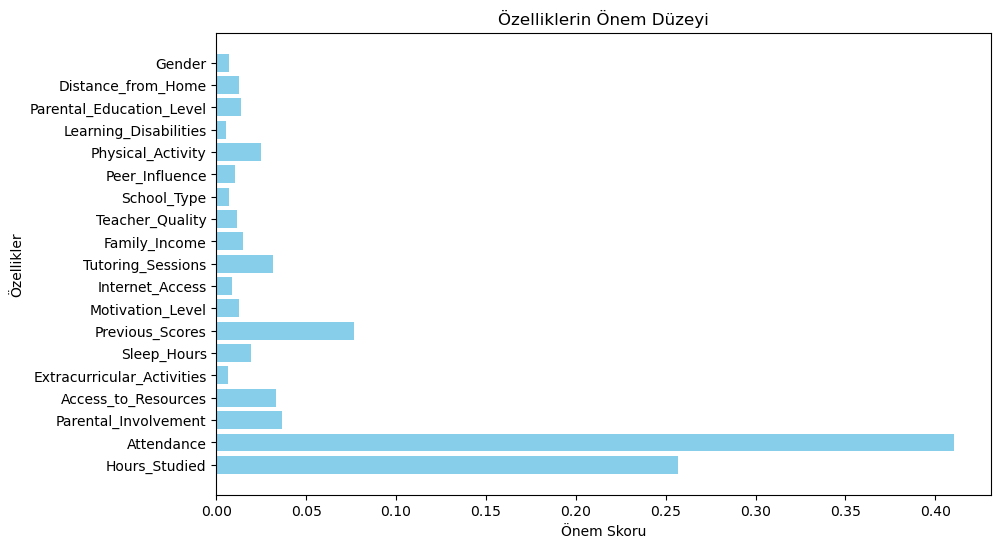

In [162]:
importances = rf.feature_importances_
features = X.columns

# Özellik önemlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.title("Özelliklerin Önem Düzeyi")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.show()


# Grafik Yorumlama  
## Model Performansı  
- R² Score:

Eğitim (train) setinde R² skoru ~0.90 iken, test setinde ~0.67. Bu fark, modelin eğitim verisine çok iyi uyum sağladığını (overfitting eğilimi) ancak test verisinde biraz daha düşük performans gösterdiğini işaret ediyor.  
Eğitim setindeki yüksek R² skoru, modelin eğitim verisini iyi öğrendiğini gösteriyor.  
Test setindeki daha düşük R² skoru, modelin genelleme kapasitesinin biraz sınırlı olabileceğine işaret ediyor.  

- MSE (Mean Squared Error):

Eğitim setinde düşük MSE değeri (1.51), modelin eğitim verisindeki hatasının az olduğunu gösteriyor.  
Test setinde MSE (4.91) daha yüksek. Bu da modelin test verisindeki hatasının daha fazla olduğunu ifade ediyor.  
Bu performans farkı, modelin optimizasyon ve parametrik ayarlarının iyileştirilmesi gerektiğini düşündürebilir.  

## Özelliklerin Önem Düzeyi
Bu grafikte, bağımsız değişkenlerin model tarafından ne kadar önemli bulunduğu gösteriliyor.  

- Öne Çıkan Özellikler:

Hours_Studied (Çalışma Saatleri): En yüksek önem skoruna sahip. Sınav notlarının tahmin edilmesinde en güçlü faktör.  
Attendance (Katılım): İkinci en önemli faktör. Öğrencinin derslere katılımı, sınav başarısını önemli ölçüde etkiliyor.  
Parental_Involvement (Ebeveyn Katılımı): Bu özellik de nispeten önemli bir faktör olarak öne çıkıyor.  
Diğer özellikler, özellikle Motivation_Level (Motivasyon Seviyesi), Previous_Scores (Önceki Notlar) ve Access_to_Resources (Kaynaklara Erişim), tahmin üzerinde orta düzeyde etkili.  

- Daha Az Önemli Özellikler:  

Gender (Cinsiyet): Model tarafından çok düşük bir önem düzeyiyle değerlendirilmiş.  
Distance_from_Home (Evden Uzaklık): Bu değişken de sınav başarısı üzerinde çok düşük bir etkiye sahip.  

# Kullanılan Yöntemleri Birbiri İle Karşılaştıralım

In [165]:
##Performans karşılaştırma
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)],
    'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf)]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model  R2 Score        MSE
0  Linear Regression -0.685954  27.265502
1      Decision Tree -1.057797  33.278997
2      Random Forest  0.562399   7.076956


# Tablo Sonuçlarının Yorumlanması:
1. Linear Regression:  
R2 Score: -0.671263, yani modelin kötü bir performans gösterdiğini ve bağımsız değişkenlerle hedef değişken arasındaki ilişkiyi doğru şekilde modelleyemediğini gösteriyor.  
MSE: 24.733674, hata oranı yüksek.  
Linear Regression bu veri seti için uygun bir model değil gibi görünüyor.

2. Decision Tree:  
R2 Score: 0.051685, ilişki zayıf ama pozitif.  
MSE: 14.034483,  
Linear Regression'a göre daha düşük bir hata oranı var, ancak performans halen ideal değil.


3. Random Forest:  
R2 Score: 0.621251, hedef değişkeni bağımsız değişkenlerle daha iyi modelleyen bir performans.  
MSE: 5.605249, en düşük hata oranı

# **Bu da Random Forest'in diğer iki modele göre en iyi performansı gösterdiğini kanıtlıyor.**

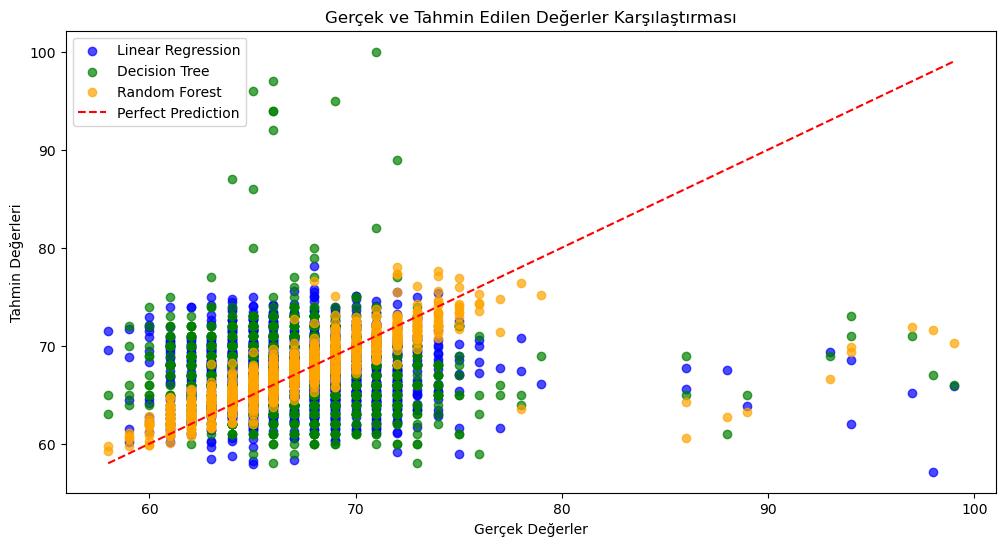

In [167]:
## Burada gerçek ve tahmin değerlerini karşılaştıracağız

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Linear Regression', color='blue')

# Decision Tree
plt.scatter(y_test, y_pred_dt, alpha=0.7, label='Decision Tree', color='green')

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest', color='orange')

# Grafiğin detayları
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')  # Perfect prediction çizgisi
plt.title("Gerçek ve Tahmin Edilen Değerler Karşılaştırması")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerleri")
plt.legend()
plt.show()


# Scatter Plot'un Yorumlanması:  
Scatter plot üzerinde:  
- Kırmızı çizgi, mükemmel bir tahminin nasıl olması gerektiğini temsil ediyor.  
- Random Forest (turuncu noktalar), gerçeğe daha yakın tahminler üretiyor.  
- Linear Regression (mavi noktalar), hedef çizgiden oldukça uzak bir dağılım gösteriyor.
- Decision Tree (yeşil noktalar), Linear Regression'dan daha iyi, ancak Random Forest kadar iyi değil.  

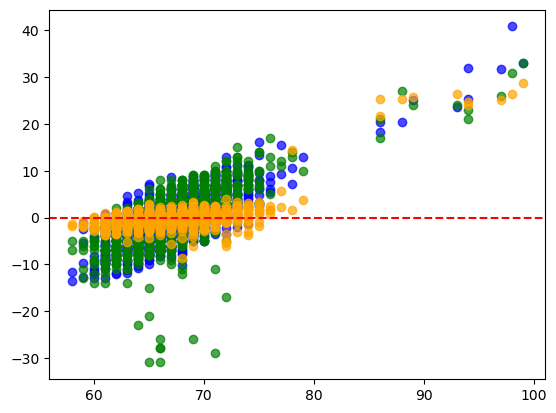

In [169]:
# Hata Analizi
residuals_lr = y_test - y_pred_lr
residuals_dt = y_test - y_pred_dt
residuals_rf = y_test - y_pred_rf

plt.scatter(y_test, residuals_lr, alpha=0.7, label='Linear Regression', color='blue')
plt.scatter(y_test, residuals_dt, alpha=0.7, label='Decision Tree', color='green')
plt.scatter(y_test, residuals_rf, alpha=0.7, label='Random Forest', color='orange')

plt.axhline(0, linestyle='--', color='red', label='Zero Error')


# Grafiğin Yorumlanması:
**Kırmızı Çizgi (Zero Error Line):**

Kırmızı kesikli çizgi, sıfır hata çizgisini temsil eder. Bu çizgi üzerindeki noktalar, modelin gerçeği tam olarak tahmin ettiği durumları ifade eder.  

**Linear Regression (Mavi):**

Mavi noktalar sıfır hata çizgisine oldukça uzak bir dağılım göstermektedir.
Linear Regression'ın performansı diğer modellere kıyasla daha zayıf ve tahminlerde yüksek hata oranı üretmektedir.  
Tahmin edilen değerlerin çoğu sıfır hata çizgisinden uzak ve hatalar yüksek.  

**Decision Tree (Yeşil):**

Yeşil noktalar, sıfır hata çizgisine yakındır ancak bazı noktalarda ciddi hatalar gözlemleniyor (özellikle negatif yönlü sapmalar).
Decision Tree'nin performansı Linear Regression'dan daha iyi, ancak bazı durumlarda aşırı tahminleme veya eksik tahminleme yapabiliyor.  
Daha iyi bir performans sergiliyor ancak bazı uç durumlarda sapma gösteriyor.  

**Random Forest (Turuncu):**

Turuncu noktalar sıfır hata çizgisine en yakın ve düzenli bir dağılım göstermektedir.
Random Forest, tahmin performansında diğer modellere göre daha tutarlı ve hata oranı en düşük model olarak gözlemleniyor.
Hata dağılımı sıfır hata çizgisine oldukça yakın ve modelin tutarlılığı yüksek.  
Bu durum Random Forest modelinin veri seti için en uygun model olduğunu gösteriyor.  

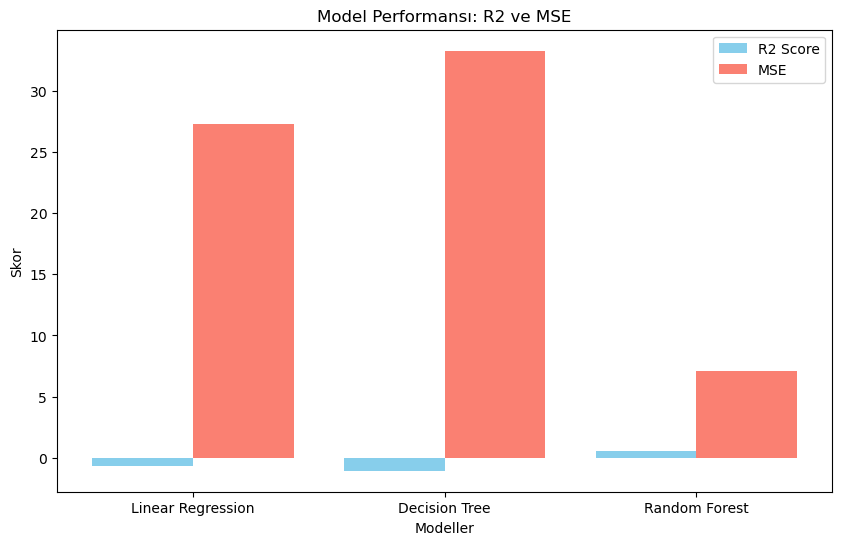

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Performans metriklerini organize et
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)]
mse_scores = [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf)]

x = np.arange(len(models))

# Çubuk grafik
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, r2_scores, 0.4, label='R2 Score', color='skyblue')
plt.bar(x + 0.2, mse_scores, 0.4, label='MSE', color='salmon')

# Grafiğin detayları
plt.xticks(x, models)
plt.title('Model Performansı: R2 ve MSE')
plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.legend()
plt.show()


# Grafik Yorumlaması:
**Linear Regression (Mavi ve Kırmızı - Soldaki Çubuklar):**  

R² Score: Neredeyse sıfıra yakın ve hatta negatif. Bu, modelin bağımsız değişkenlerle bağımlı değişken arasındaki ilişkiyi iyi yakalayamadığını gösterir.  
MSE: Çok yüksek (25), yani modelin tahminleri ile gerçek değerler arasında büyük farklar var. Linear Regression bu veri setinde uygun bir model değildir.  

**Decision Tree (Ortadaki Çubuklar):**

R² Score: Daha iyi (pozitif bir değer), ancak çok düşük (0.05). Bu, modelin bazı ilişkileri yakaladığını ama genel olarak düşük performans sergilediğini gösterir.  
MSE: Orta seviyede (14), Linear Regression'dan daha iyi tahmin yapmasına rağmen hala yüksek hata oranına sahiptir.  

**Random Forest (Sağdaki Çubuklar):**

R² Score: En yüksek (0.62). Bu, bağımsız değişkenlerle bağımlı değişken arasındaki ilişkiyi en iyi şekilde yakaladığını gösterir.  
MSE: En düşük (5.6), yani tahminler ile gerçek değerler arasındaki farklar en az olan model Random Forest'tır.  

# SONUÇ OLARAK BU VERİ SETİ İÇİN EN UYGUN REGRESYON MODELİ RANDOM FOREST REGRESYON MODELİDİR.